<a href="https://colab.research.google.com/github/shazm12/Influence-Networks-For-Popular-Music/blob/main/Influence_Networks_For_Popular_Music.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social And Information Networks Project**


In this project, I will be performing an analysis of the taste of the listeners on platforms like Spotify or Apple music or such and would try to mark all important insights from harmonic features of today’s music like timbres, usage of major, minor or pentatonic scales used in the production of music to even simpler aspects of music like whether the 
songs have some catchy beats or melodies or like how much proportion of listeners would like to dance or sing along the song. All of the following features would be considered and this will help to even address what proportion of listeners like to hear a particular artist or a song. This all will be performed using the link prediction with input as the graph content and contents and features of the song as well to calculate the highest accuracy scores which will further help me in the analysis proposed.


# **Keywords**

**BillBoard** - Billboard is an American music and entertainment magazine published weekly by the Billboard-Hollywood Reporter Media Group, a division of MRC Media & Info. The magazine provides music charts, news, video, opinion, reviews, events, and style related to the music industry.

**Spotify** - Spotify is a Swedish audio streaming and media services provider founded on 23 April 2006 by Daniel Ek and Martin Lorentzon. It is the world's largest music streaming service provider, with over 381 million monthly active users, including 172 million paying subscribers, as of September 2021.

# **Base Paper**

CS224W Final Report: Influence Networks in Popular Music Marco Alban, Vivek Choksi, Stephanie Tsai, Stanford CS Department. [Link](http://snap.stanford.edu/class/cs224w-2015/projects_2015/Influence_Networks_in_Popular_Music.pdf)

# **Dataset Used**

The Dataset used is a Demographic-based Top Artist In A Country Dataset where the dataset contains about 53 Countries in a form of dictonary keys with values as top 10 music artist in the given region for a particular year given. The Datset was extracted from one the research work done with the same base paper as mine and I have also included it in the Literature survey. The data were all collected from Last.fm API.


# **Extracting Dataset and Preprocessing Of The Dataset**

In [1]:
from google.colab import drive
drive._mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyvis

In [ ]:
import pickle
import networkx as nx
import matplotlib
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np


In [ ]:

def store_dict_pickle(file_name, dictionary):
    """
        Saves a dictionary to a pickle file

        :param file_name: the name of the file the data will be stored in
        :type file_name: str

        :param dictionary: the dictionary to be stored in the file
        :type dictionary: dict
    """

    with open('/content/drive/MyDrive/music data/' + file_name + '.pkl', 'wb') as f:
        pickle.dump(dictionary, f, pickle.HIGHEST_PROTOCOL)


def load_dict_pickle(file_path):
    """
    Retrieves a dictionary form the specified file

    :param file_name: the name of the file to load
    :type file_name: str

    :return: the dictionary retrieved from the file
    :rtype dict
    """

    with open(file_path, 'rb') as f:
        dictionary =  pickle.load(f)
    return dictionary

In [ ]:
#intializing dictionary variables
dict_05 = load_dict_pickle("/content/drive/MyDrive/music data/dictionary/2005_country_artist.pkl")
dict_06 = load_dict_pickle("/content/drive/MyDrive/music data/dictionary/2006_country_artist.pkl")
dict_07 = load_dict_pickle("/content/drive/MyDrive/music data/dictionary/2007_country_artist.pkl")
dict_08 = load_dict_pickle("/content/drive/MyDrive/music data/dictionary/2008_country_artist.pkl")
dict_09 = load_dict_pickle("/content/drive/MyDrive/music data/dictionary/2009_country_artist.pkl")
dict_10 = load_dict_pickle("/content/drive/MyDrive/music data/dictionary/2010_country_artist.pkl")
dict_13 = load_dict_pickle("/content/drive/MyDrive/music data/dictionary/2013_country_artist.pkl")


In [ ]:
print(dict_06['United States'])

{'The Black Eyed Peas': 556, 'Everclear': 2915, 'Afi': 5510, 'Blink-182': 1781, 'Frank Sinatra': 489, 'Incubus': 3041, 'Say Anything': 918, 'David Bowie': 5051, '311': 431, 'Angel City': 58, 'Freeform Five': 14, 'Jefferson Airplane': 135, 'Senses Fail': 381, 'Baltimora': 20, 'Atmosphere': 574, 'Allister': 76, 'Stroke 9': 88, 'Özgür Can': 4, 'Gipsy King': 2, 'Red Hot Chili Peppers': 4078, 'The Starting Line': 310, 'Handsome Boy Modeling School': 164, 'Misfits': 1933, 'Oasis': 2762, 'Unwritten Law': 84, 'Fonzerelli': 12, 'Chiodos': 106, 'Beulah': 703, 'Angels & Airwaves': 345, 'Fall Out Boy': 2117, 'Death Cab For Cutie': 7897, 'Forgive Durden': 107, '30 Seconds To Mars': 783, 'Jedi Mind Tricks': 180, 'Third Eye Blind': 1138, 'The Doors': 1464, 'Hieroglyphics': 43, 'Story Of The Year': 122, 'Spitalfield': 116, 'Northstar': 126, 'Thrice': 149, 'Cky': 247, 'The Faint': 1812, 'Higher': 21, 'Ricky Nelson': 64, 'Sound Fiction': 5, 'Anberlin': 383, 'Bonobo': 197, 'Boys Like Girls': 145, 'Paramo

In [ ]:
import copy

def top_artists(year_dict, top_number):
    # create graph to represent trends for given year
    G = nx.Graph()
    
    # loop through each artist in the dictionary
    for country in year_dict:
        # create country node & add it
        G.add_node(country)
        G.nodes[country]['country'] = True
        
        # get top 5 artists for current country
        artists = copy.copy(year_dict[country])
        num_artist = len(artists)
        for i in range(top_number):
            # make sure the country has enough top artists
            if( num_artist < top_number):
                # remove country's node and skip it
                G.remove_node(country)
                break;
            
            # find ith top artist
            top = max(artists.keys(), key=(lambda k: artists[k]))
            
            #create node for ith top artist and make a conenction b/n it and the country
            G.add_node(top)
            G.nodes[top]['artist'] = True
            G.add_edge(country, top, weight=year_dict[country][top], length=50)
            
            artists.pop(top)

    return G

In [ ]:
G_05 = top_artists(dict_05, 5)
G_06 = top_artists(dict_06, 5)
G_07 = top_artists(dict_07, 5)
G_08 = top_artists(dict_08, 5)
G_09 = top_artists(dict_09, 5)
G_10 = top_artists(dict_10, 5)


# **Nodes and Edges Of G_06**

In [ ]:
G_06.nodes

NodeView(('Japan', 'Cornelius', 'Björk', 'Suzukiski', 'Secret Machines', 'Squarepusher', 'Peru', 'The Libertines', 'Black Rebel Motorcycle Club', 'Babyshambles', 'Oasis', 'The Strokes', 'United States', 'Radiohead', 'The Beatles', 'Death Cab For Cutie', 'Metric', 'Elliott Smith', 'Bulgaria', 'Muse', 'Panic At The Disco', 'Justin Timberlake', 'Mylo', 'Depeche Mode', 'Russian Federation', 'Rancid', 'Placebo', 'I Am Kloot', '7 Seconds', 'Arctic Monkeys', 'Finland', 'Children Of Bodom', 'The 69 Eyes', 'Tool', 'Type O Negative', 'Metallica', 'Romania', 'Red Hot Chili Peppers', 'Queen', 'Coldplay', 'Pink Floyd', 'Kumm', 'United Kingdom', 'Belle And Sebastian', 'Mando Diao', 'Snow Patrol', 'Mexico', 'Joy Division', 'Indochine', 'Incubus', 'Germany', 'The Kinks', 'Zao', 'Led Zeppelin', 'Canada', 'Broadcast', 'Evanescence', 'Sigur Rós', 'Sweden', 'Soilwork', 'Melvins', 'Pantera', 'Black Flag', 'Sabaton', 'Turkey', 'Frédéric Chopin', 'Tenhi', 'Death', 'Pain Of Salvation', 'Italy', 'Sentenced', '

In [ ]:
G_06.edges

EdgeView([('Japan', 'Cornelius'), ('Japan', 'Björk'), ('Japan', 'Suzukiski'), ('Japan', 'Secret Machines'), ('Japan', 'Squarepusher'), ('Björk', 'Italy'), ('Björk', 'Switzerland'), ('Björk', 'Malta'), ('Peru', 'The Libertines'), ('Peru', 'Black Rebel Motorcycle Club'), ('Peru', 'Babyshambles'), ('Peru', 'Oasis'), ('Peru', 'The Strokes'), ('The Libertines', 'Austria'), ('Black Rebel Motorcycle Club', 'British Indian Ocean Territory'), ('The Strokes', 'Germany'), ('United States', 'Radiohead'), ('United States', 'The Beatles'), ('United States', 'Death Cab For Cutie'), ('United States', 'Metric'), ('United States', 'Elliott Smith'), ('Radiohead', 'United Kingdom'), ('Radiohead', 'Latvia'), ('Radiohead', 'Estonia'), ('Radiohead', 'British Indian Ocean Territory'), ('Radiohead', 'Malta'), ('The Beatles', 'Czech Republic'), ('The Beatles', 'Congo, the Democratic Republic of the'), ('Death Cab For Cutie', 'Spain'), ('Elliott Smith', 'Algeria'), ('Bulgaria', 'Muse'), ('Bulgaria', 'Panic At Th

In [ ]:
##CONTINUE FROM HERE

# **Plotting the Network Graph for G_05**

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12512 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12483 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12512 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12483 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 12463 missing from current font.
  font.set_text

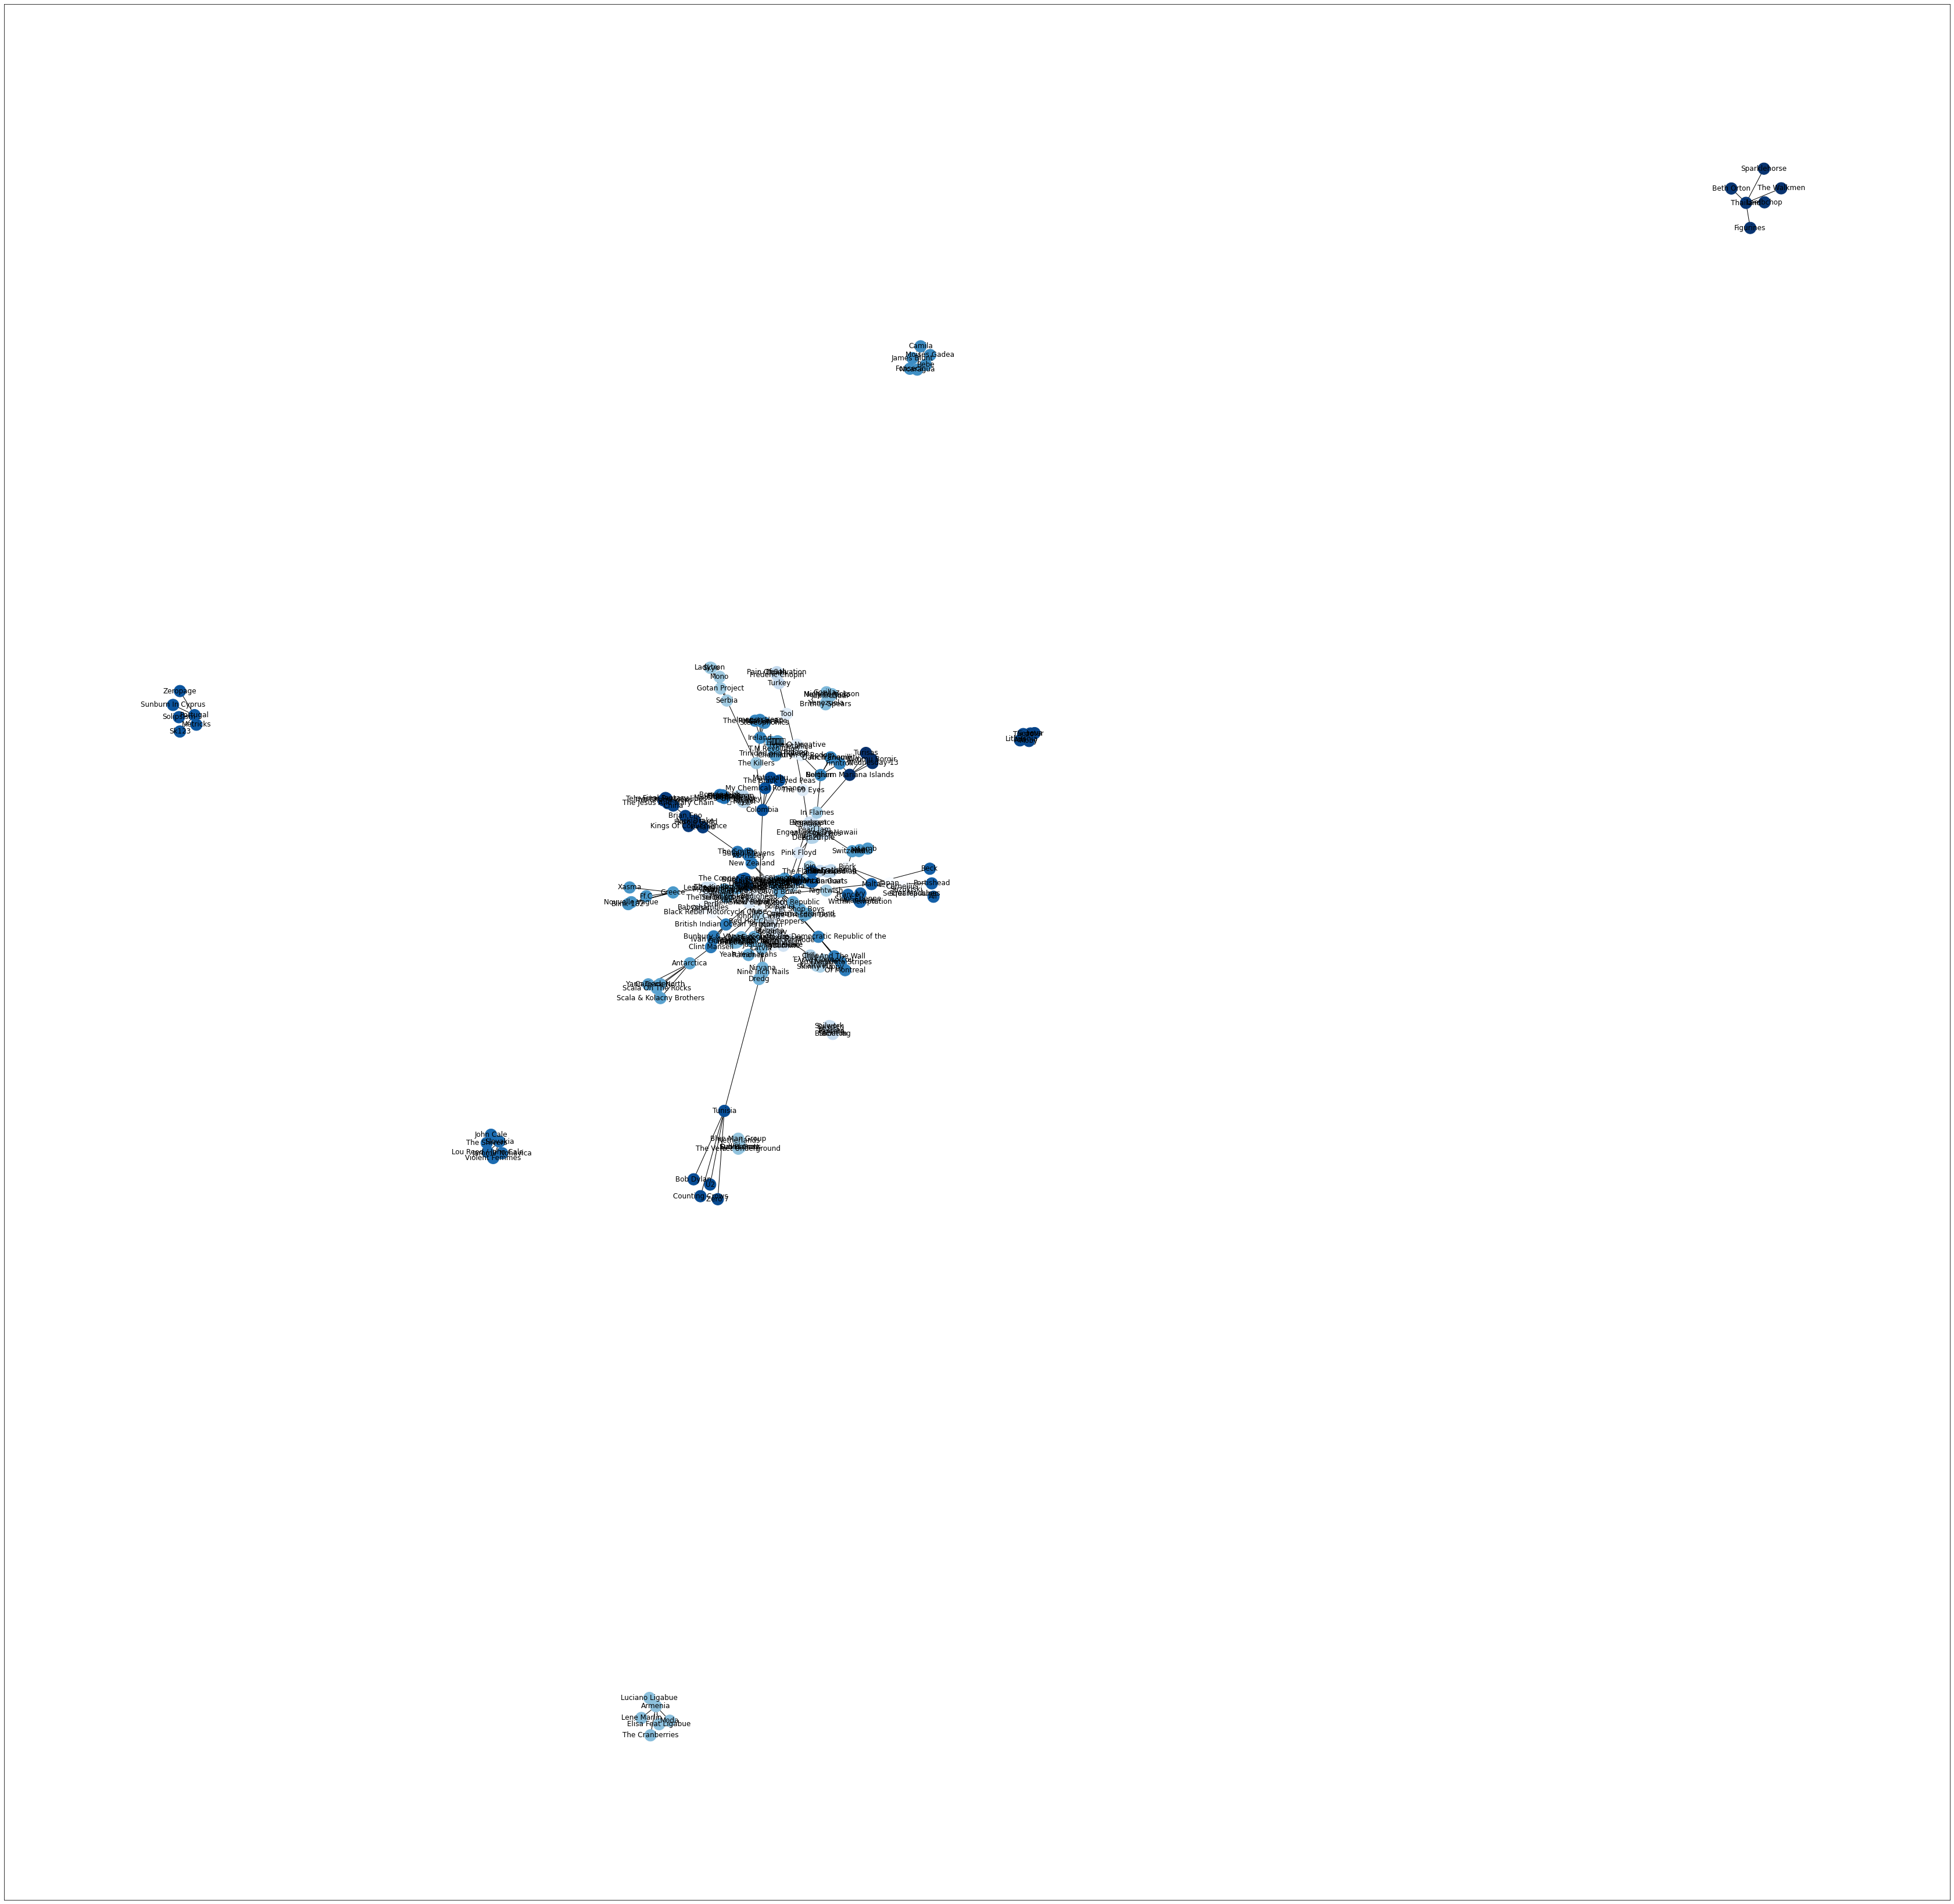

In [ ]:
plt.figure(3,figsize=(60,60))
nx.draw_networkx(G_06,with_labels=True,node_size=400,cmap=plt.cm.Blues,
        node_color=range(len(G_06)))
plt.savefig("graph.png", dpi=500, facecolor='w', edgecolor='w',orientation='portrait', papertype=None, format=None,transparent=False, bbox_inches=None, pad_inches=0.1) 

In [ ]:
def top_artists_only_us(year_dict, top_number):

    G = nx.Graph()

    artists = copy.copy(year_dict['United States'])
    num_artist = len(artists)
    for i in range(top_number):

      top = max(artists.keys(), key=(lambda k: artists[k]))      

      G.add_node(top)
      G.nodes[top]['artist'] = True
      G.add_edge('United States', top, weight=year_dict['United States'][top])
              
      artists.pop(top)

    return G




In [ ]:
G_06_artists_us = top_artists_only_us(dict_06,20)

# **Plotting Top 20 Artists in US**

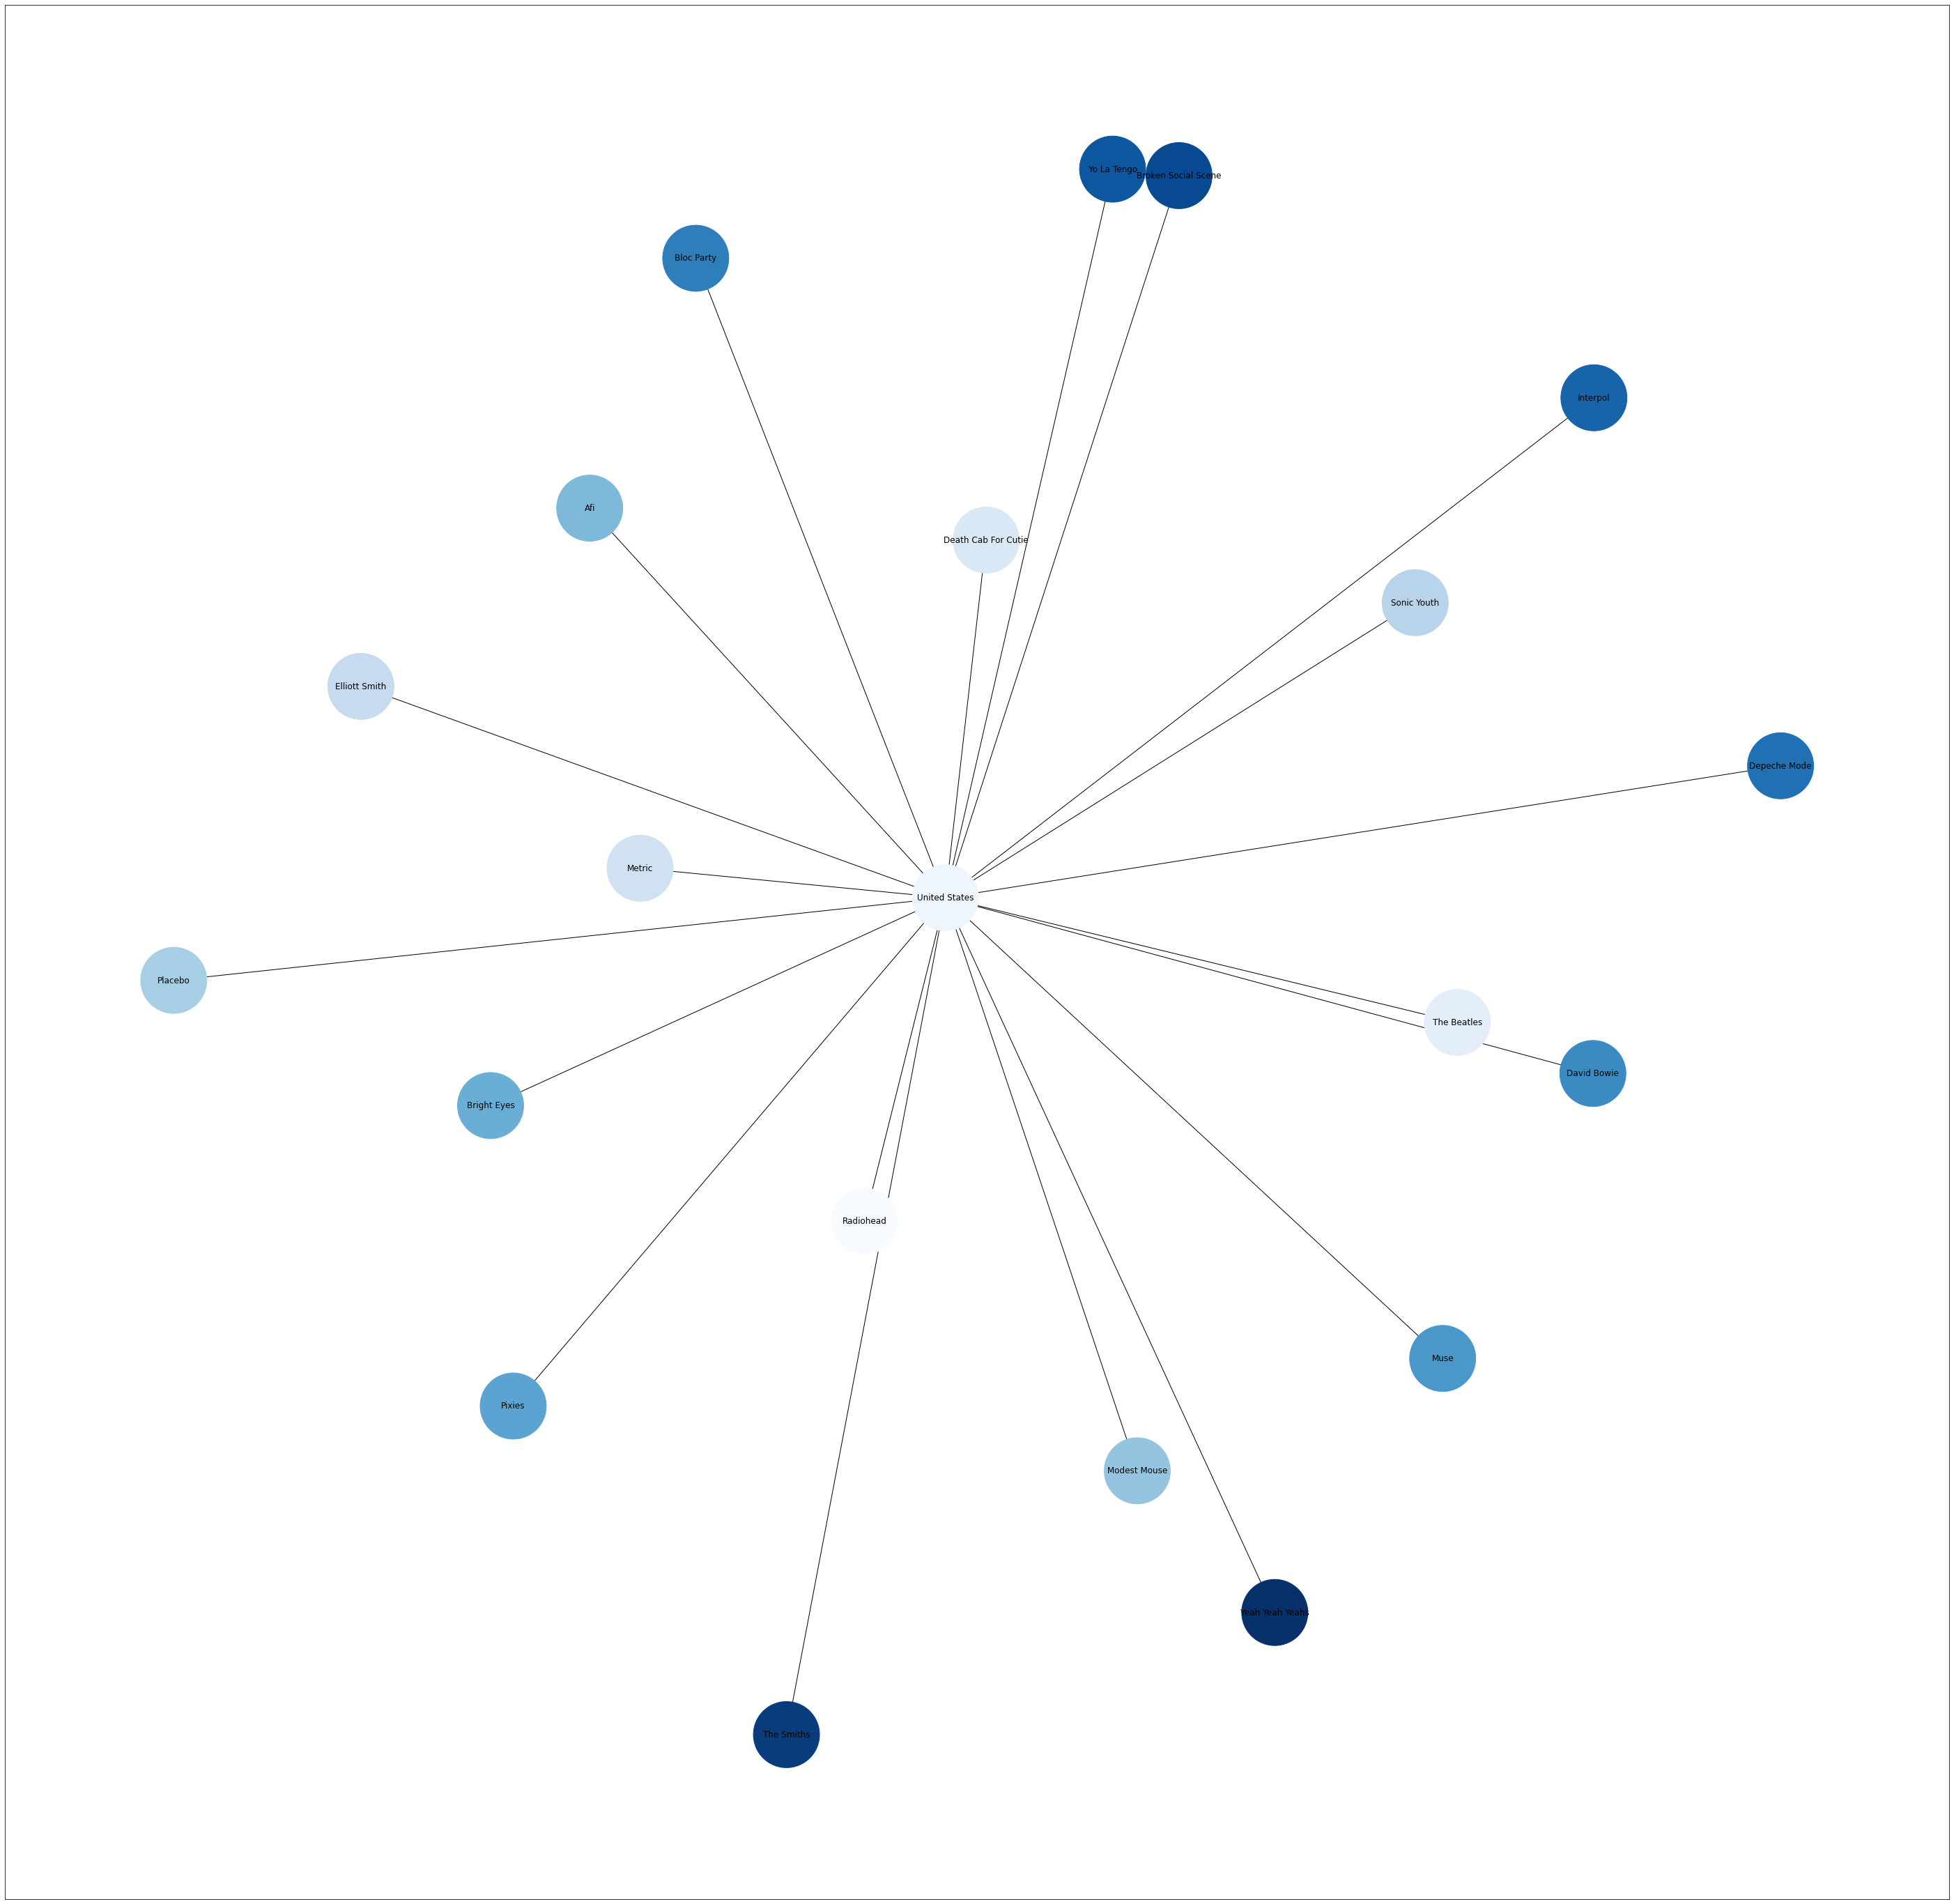

In [ ]:
plt.figure(3,figsize=(50,50))
nx.draw_networkx(G_06_artists_us,with_labels=True,node_size=9000,cmap=plt.cm.Blues,
        node_color=range(len(G_06_artists_us)))
plt.show()

# **Plotting Top 20 artists in UK**

In [ ]:
def top_artists_only_uk(year_dict, top_number):

    G = nx.Graph()
    
    # loop through each artist in the dictionary

    artists = copy.copy(year_dict['United Kingdom'])
    num_artist = len(artists)
    for i in range(top_number):
        

      top = max(artists.keys(), key=(lambda k: artists[k]))
              

      G.add_node(top)
      G.nodes[top]['artist'] = True
      G.add_edge('United Kingdom', top, weight=year_dict['United Kingdom'][top])
              
      artists.pop(top)

    return G

In [ ]:
G_06_artists_uk = top_artists_only_uk(dict_06,20)

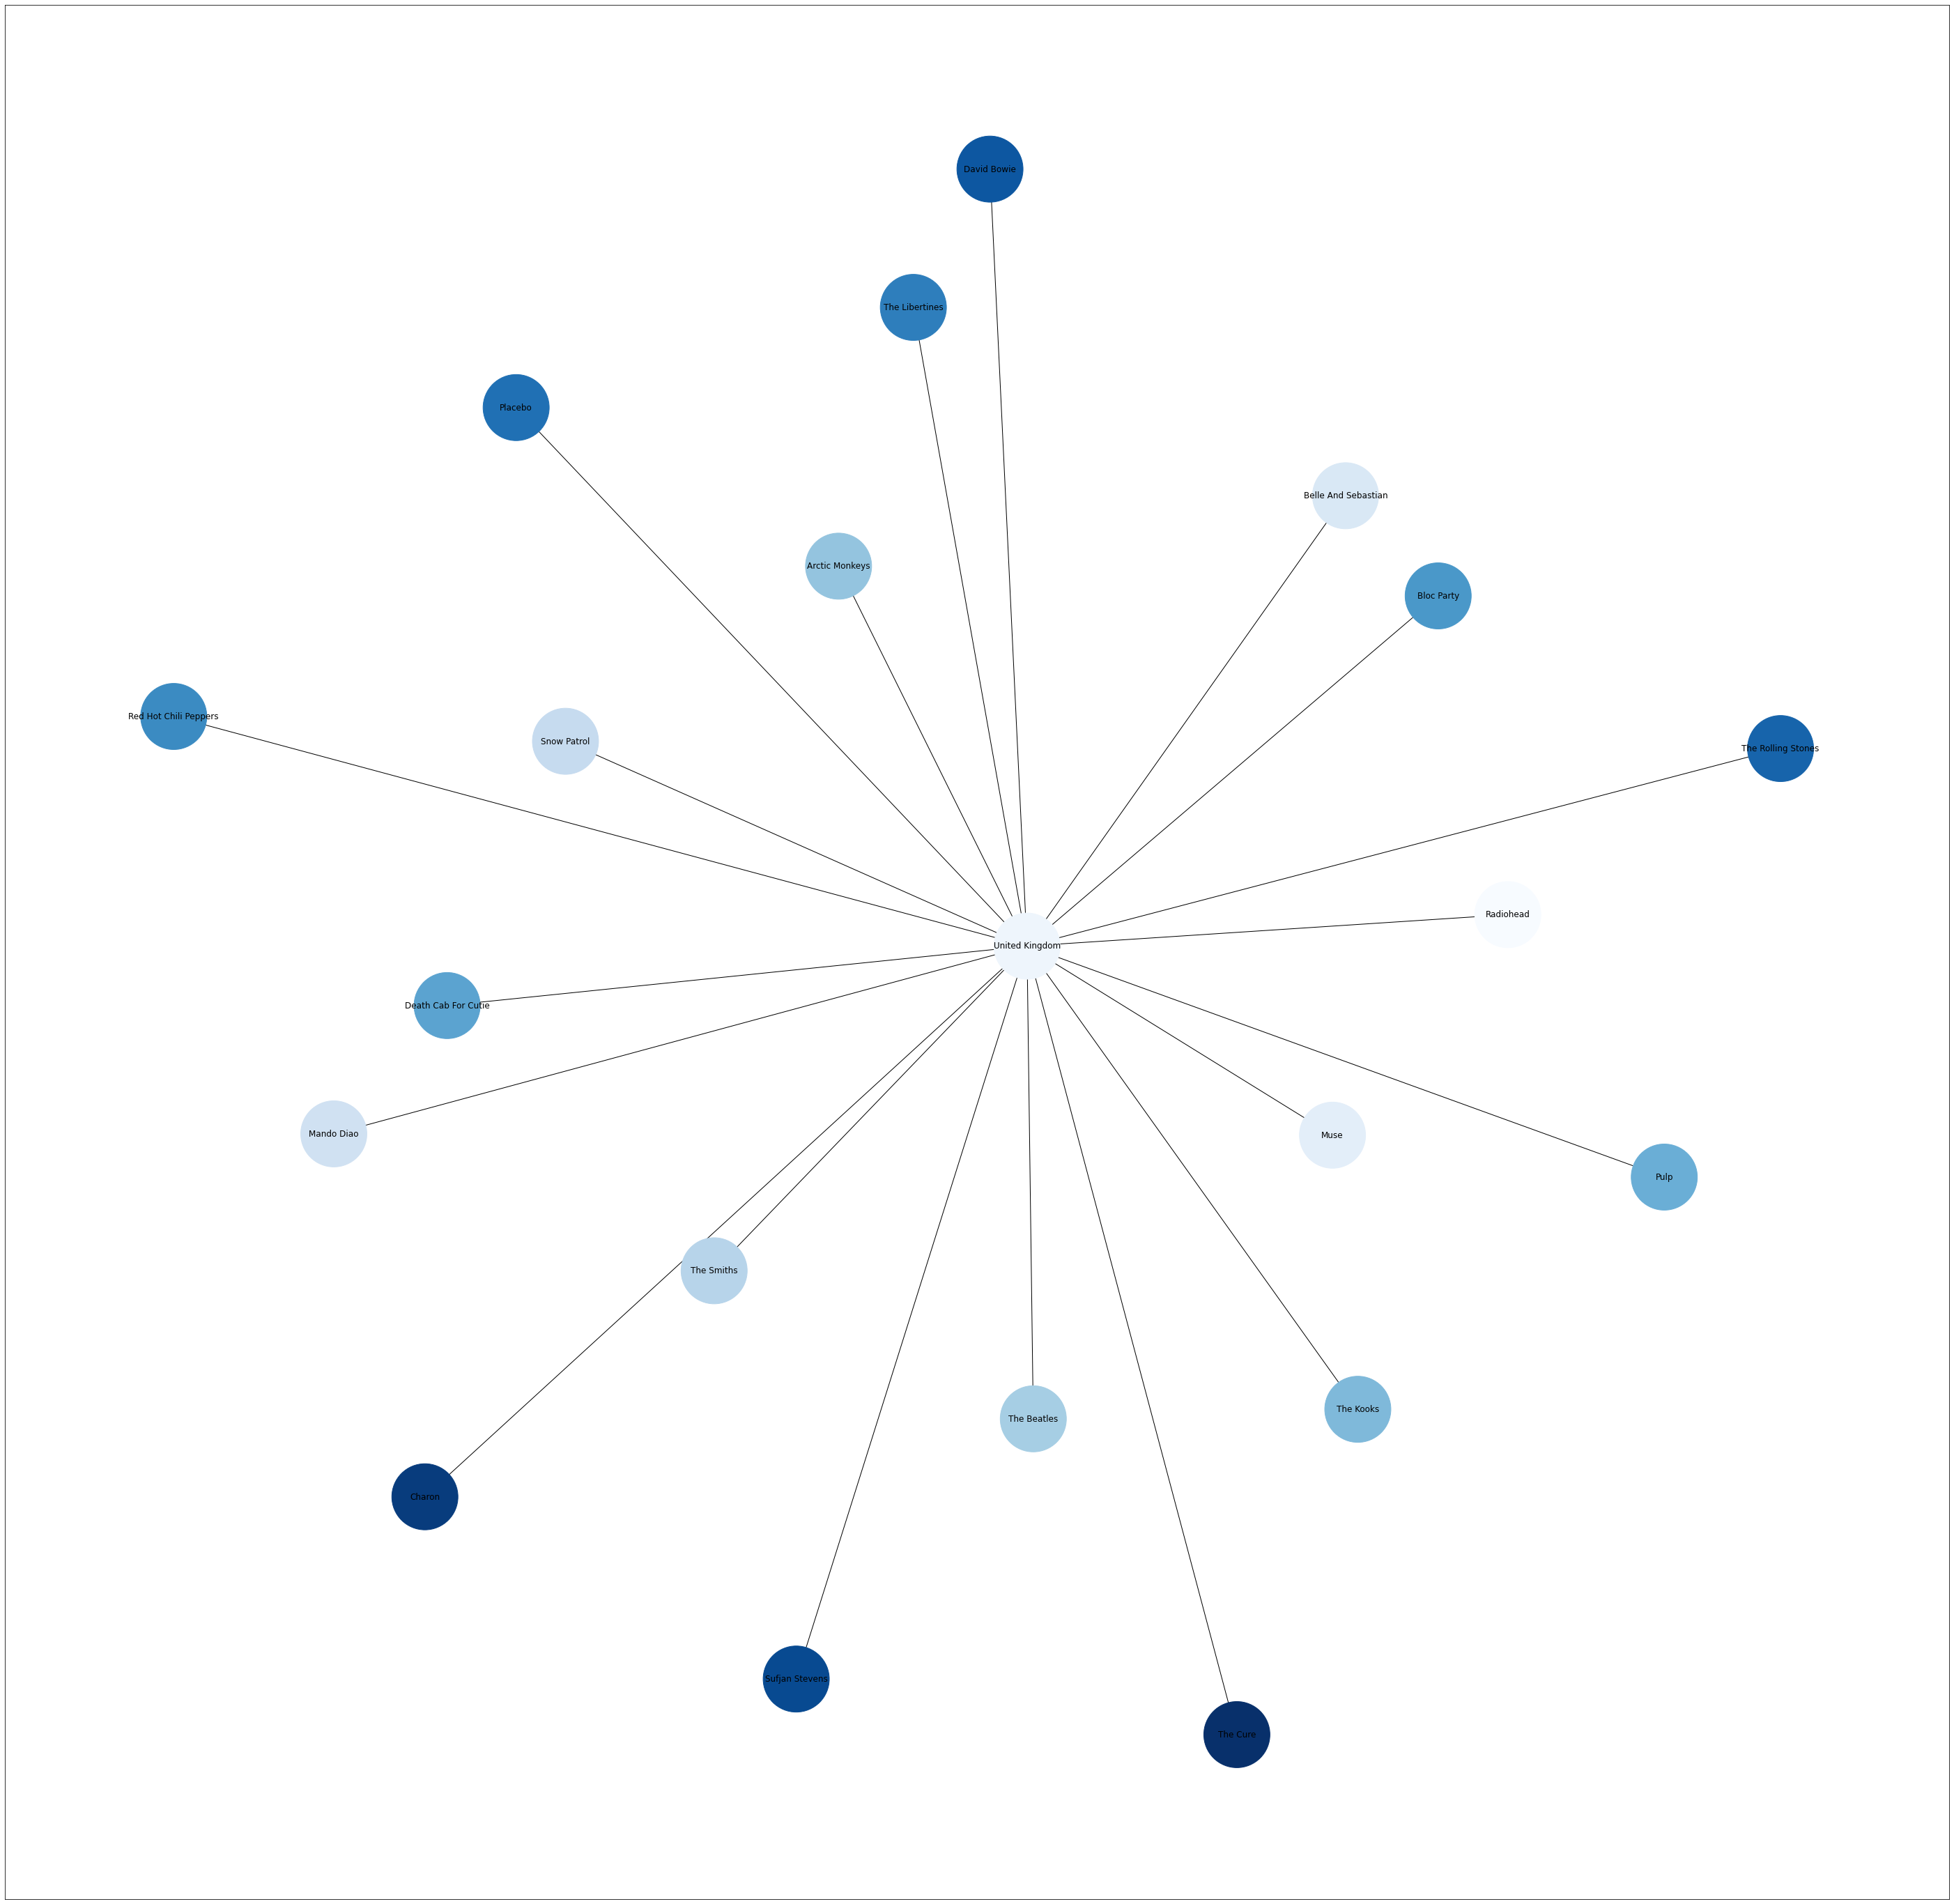

In [ ]:
plt.figure(3,figsize=(50,50))
nx.draw_networkx(G_06_artists_uk,with_labels=True,node_size=9000,cmap=plt.cm.Blues,
        node_color=range(len(G_06_artists_uk)))
plt.show()

# **Creating a List of Countries from the Given Dataset**

In [ ]:
country = dict_06.keys()

In [ ]:
country

dict_keys(['Japan', 'Peru', 'United States', 'Bulgaria', 'Russian Federation', 'Finland', 'Romania', 'United Kingdom', 'Mexico', 'Germany', 'Canada', 'Sweden', 'Turkey', 'Italy', 'Poland', 'Brazil', 'Chile', 'Croatia', 'Serbia', 'Netherlands', 'Armenia', 'Venezuela', 'Norway', 'Latvia', 'Spain', 'Estonia', 'Czech Republic', 'Antarctica', 'Trinidad and Tobago', 'Switzerland', 'Greece', 'Australia', 'Nicaragua', 'Ireland', 'Belgium', 'Congo, the Democratic Republic of the', 'British Indian Ocean Territory', 'New Zealand', 'Argentina', 'Slovakia', 'France', 'Algeria', 'Malta', 'Austria', 'Netherlands Antilles', 'Portugal', 'Colombia', 'Tunisia', 'Lithuania', 'China', 'Iceland', 'Thailand', 'Northern Mariana Islands'])

In [ ]:
len(country)

53

# **Nodes With highest Degree Centrality in G_06**

# **Artists**

In [ ]:
import networkx as nx
import operator
deg=nx.degree_centrality(G_06)
sorted_d = dict( sorted(deg.items(), key=operator.itemgetter(1),reverse=True))
final_sorted_d = []
for i in sorted_d.keys():
  if i not in country:
    final_sorted_d.append(i)
print(final_sorted_d)

['Radiohead', 'Muse', 'Placebo', 'Björk', 'David Bowie', 'The Beatles', 'Depeche Mode', 'Pink Floyd', 'Mando Diao', 'In Flames', 'The Killers', 'The Libertines', 'Black Rebel Motorcycle Club', 'The Strokes', 'Death Cab For Cutie', 'Elliott Smith', 'Arctic Monkeys', 'Children Of Bodom', 'The 69 Eyes', 'Tool', 'Red Hot Chili Peppers', 'Coldplay', 'Sigur Rós', 'Johnny Cash', 'Nightwish', 'Sonic Youth', 'Finntroll', 'The Smiths', 'Brian Eno', 'Cornelius', 'Suzukiski', 'Secret Machines', 'Squarepusher', 'Babyshambles', 'Oasis', 'Metric', 'Panic At The Disco', 'Justin Timberlake', 'Mylo', 'Rancid', 'I Am Kloot', '7 Seconds', 'Type O Negative', 'Metallica', 'Queen', 'Kumm', 'Belle And Sebastian', 'Snow Patrol', 'Joy Division', 'Indochine', 'Incubus', 'The Kinks', 'Zao', 'Led Zeppelin', 'Broadcast', 'Evanescence', 'Soilwork', 'Melvins', 'Pantera', 'Black Flag', 'Sabaton', 'Frédéric Chopin', 'Tenhi', 'Death', 'Pain Of Salvation', 'Sentenced', 'The Gathering', 'Blind Guardian', 'Dir En Grey', 'ム

# **Mesuring Closeness Centrality**

# **Artists**

In [ ]:

import networkx as nx
G=nx.erdos_renyi_graph(100,0.6)
c=nx.closeness_centrality(G_06)
sorted_d = dict( sorted(c.items(), key=operator.itemgetter(1),reverse=True))
final_sorted_d = []
for i in sorted_d.keys():
  if i not in country:
    final_sorted_d.append(i)
print(final_sorted_d)

['Radiohead', 'Björk', 'Red Hot Chili Peppers', 'Sigur Rós', 'Placebo', 'Air', 'Beck', 'Portishead', 'Muse', 'The Beatles', 'Pink Floyd', 'Mando Diao', 'Elliott Smith', 'John Frusciante', 'Ramones', 'Yeah Yeah Yeahs', 'Black Rebel Motorcycle Club', 'Death Cab For Cutie', 'Nits', 'Múm', 'Lamb', 'Belle And Sebastian', 'Snow Patrol', 'Sentenced', 'The Gathering', 'Blind Guardian', 'Metric', 'Nirvana', 'Nine Inch Nails', 'Dredg', 'David Bowie', 'The Libertines', 'Sonic Youth', 'Bunbury & Vegas', 'Iván Ferreiro', 'Clint Mansell', 'The 69 Eyes', 'Cornelius', 'Suzukiski', 'Secret Machines', 'Squarepusher', 'Coldplay', 'Queen', 'Kumm', 'Broadcast', 'Evanescence', 'The Strokes', 'The Smiths', 'Morrissey', 'Sufjan Stevens', 'Arctic Monkeys', 'Suede', 'Iamx', 'The Cooper Temple Clause', 'Bright Eyes', 'Pet Shop Boys', 'The Dresden Dolls', 'Franz Ferdinand', 'Tilly And The Wall', 'The White Stripes', 'Of Montreal', 'The Killers', 'Rancid', 'I Am Kloot', '7 Seconds', 'The Kinks', 'Zao', 'Led Zeppel

# **Measuring Betweeness Centrality**

# **Artists**

In [ ]:
import networkx as nx
G=nx.erdos_renyi_graph(50,0.5)
b=nx.betweenness_centrality(G_06)
sorted_d = dict( sorted(b.items(), key=operator.itemgetter(1),reverse=True))
final_sorted_d = []
for i in sorted_d.keys():
  if i not in country:
    final_sorted_d.append(i)
print(final_sorted_d)

['Radiohead', 'Björk', 'Muse', 'The 69 Eyes', 'Placebo', 'Sigur Rós', 'Children Of Bodom', 'Red Hot Chili Peppers', 'Pink Floyd', 'In Flames', 'The Killers', 'The Smiths', 'The Beatles', 'David Bowie', 'Mando Diao', 'Depeche Mode', 'Tool', 'Coldplay', 'Johnny Cash', 'Nightwish', 'Brian Eno', 'Elliott Smith', 'The Libertines', 'Black Rebel Motorcycle Club', 'Death Cab For Cutie', 'Finntroll', 'Sonic Youth', 'The Strokes', 'Arctic Monkeys', 'Cornelius', 'Suzukiski', 'Secret Machines', 'Squarepusher', 'Babyshambles', 'Oasis', 'Metric', 'Panic At The Disco', 'Justin Timberlake', 'Mylo', 'Rancid', 'I Am Kloot', '7 Seconds', 'Type O Negative', 'Metallica', 'Queen', 'Kumm', 'Belle And Sebastian', 'Snow Patrol', 'Joy Division', 'Indochine', 'Incubus', 'The Kinks', 'Zao', 'Led Zeppelin', 'Broadcast', 'Evanescence', 'Soilwork', 'Melvins', 'Pantera', 'Black Flag', 'Sabaton', 'Frédéric Chopin', 'Tenhi', 'Death', 'Pain Of Salvation', 'Sentenced', 'The Gathering', 'Blind Guardian', 'Dir En Grey', 'ム

# **Measuring Influence of Artist Nodes on a Global Scale Using PageRank Algorithm**


PageRank (PR) is an algorithm used by Google Search to rank websites in their search engine results. PageRank was named after Larry Page, one of the founders of Google. PageRank is a way of measuring the importance of website pages.

In [ ]:
import networkx as nx
G=nx.barabasi_albert_graph(60,41)
pr=nx.pagerank(G_06,0.4)
sorted_d = dict( sorted(pr.items(), key=operator.itemgetter(1),reverse=True))
final_sorted_d = []
for i in sorted_d.keys():
  if i not in country:
    final_sorted_d.append(i)
print(final_sorted_d)

['Placebo', 'Muse', 'Radiohead', 'Mando Diao', 'Chemistry', 'The Killers', 'Björk', 'Depeche Mode', 'Britney Spears', 'Nightwish', 'David Bowie', 'Soilwork', 'Metricks', 'Children Of Bodom', 'The Smiths', 'Pink Floyd', 'In Flames', 'Elliott Smith', 'The Beatles', 'Brian Eno', 'John Frusciante', 'Johnny Cash', 'Red Hot Chili Peppers', 'Black Rebel Motorcycle Club', 'Luciano Ligabue', 'The Libertines', 'Atb', 'Blue Man Group', 'Cornelius', 'Bel Canto', 'Sonic Youth', 'Death Cab For Cutie', 'Matchbox Twenty', 'The 69 Eyes', 'Coldplay', 'Nits', 'Frédéric Chopin', 'Fonseca', 'Tool', 'Finntroll', 'Dir En Grey', 'Nirvana', 'Ff.C', 'Arctic Monkeys', 'Pet Shop Boys', 'Gotan Project', 'Lambchop', 'Sentenced', 'Múm', 'Rancid', 'ムック', '雅-Miyavi-', 'The Jesus And Mary Chain', 'Beth Orton', 'Tilly And The Wall', 'Tiësto', 'Queen', 'Mono', 'Bebe', 'James Blunt', 'Mägo De Oz', 'Panic At The Disco', 'Tori Amos', 'Jaromír Nohavica', 'Figurines', 'Television Personalities', 'John Cale', 'Stereophonics', 

# **Finding Jaccard Similarity Between two consecutive years dataset dictonary to find similarity in influence of an artist on time basis.**

The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. Although it’s easy to interpret, it is extremely sensitive to small samples sizes and may give erroneous results, especially with very small samples or data sets with missing observations.

Formula for calucalting Jaccard Similarity is - 

J(A,B) = |A n B| / |A U B| 

In [ ]:



G_05 = top_artists(dict_05, 5)
G_06 = top_artists(dict_06, 5)
G_07 = top_artists(dict_07, 5)
G_08 = top_artists(dict_08, 5)
G_09 = top_artists(dict_09, 5)


def Jaccard(neighborhood1, neighborhood2):
    """
        J(A,B) = |A n B| / |A U B| 
    """
    #want to iterate through longer list;
    neighborhood1 = list(neighborhood1)
    neighborhood2 = list(neighborhood2)
    if len(neighborhood1) >= len(neighborhood2):
        list1 = neighborhood1
        list2 = neighborhood2
    else:
        list1 = neighborhood2
        list2 = neighborhood1
    
    #AND --> A n B
    intersection = 0
    #OR --> A U B
    #combined the lists & then get the set to only have unique occurrences. Then get the length
    union = len(set(list1 + list2))
    

    for node in list1:
        #if it's concordant
        if node in list2:
            intersection += 1

    #calculate index
    return intersection / union

In [ ]:

index = Jaccard(G_08.neighbors('United States'), G_09.neighbors('United States'))

# put the years in a dictionary
graph_years = {5: G_05, 6: G_06, 7: G_07, 8: G_08, 9: G_09}
years = [G_05, G_06, G_07, G_08, G_09]

def years_similarity(years):
    # getting Jaccard similarity for each country from years 2005-2006. Where the similarity is calculated for consecutive years
    
    # make dicionary to hold all similarities

    results = dict()
    
    # get all countries from the graph
    for graph in years:
        x=1
        for country in nx.get_node_attributes(graph, 'country').keys():
            if not country in results:
                results[country] = list()
                
    # get Jaccard Similarities
    for i in range(len(years) - 1):
        for country in results:
            current_year = years[i] 
            next_year = years[i+1]
            if country in current_year and country in next_year:
                index = Jaccard(current_year.neighbors(country), next_year.neighbors(country))
                results[country].append(index)
            else:
                results[country].append(-1)
                
    return results

x = years_similarity(years)


# **Put Jaccard Similarities into CSV File**

In [ ]:
import csv

def write_Jaccard_to_CSV(similarities):
    file = open('jaccard_indexes.csv', 'w', newline='')
    writer = csv.writer(file)


    row = []
    row.append('Country')
    row.append('2005-2006')
    row.append('2006-2007')
    row.append('2007-2008')
    row.append('2008-2009')

    writer.writerow(row)

    for country in similarities:
        row = []
        row.append(country)
        for item in similarities[country]:
            row.append(item)
        writer.writerow(row)
        
    file.close()
    
write_Jaccard_to_CSV(x)


In [ ]:
import pandas as pd
jaccard_sim = pd.read_csv('jaccard_indexes.csv')
jaccard_sim.head()

,Country,2005-2006,2006-2007,2007-2008,2008-2009
0,United States,0.250000,0.428571,0.250000,0.428571
1,Finland,0.000000,0.250000,0.250000,0.428571
2,United Kingdom,0.111111,0.000000,0.111111,0.666667
3,Mexico,0.111111,0.111111,0.250000,0.250000
4,Canada,0.111111,0.111111,0.250000,0.111111


# **Getting Results**

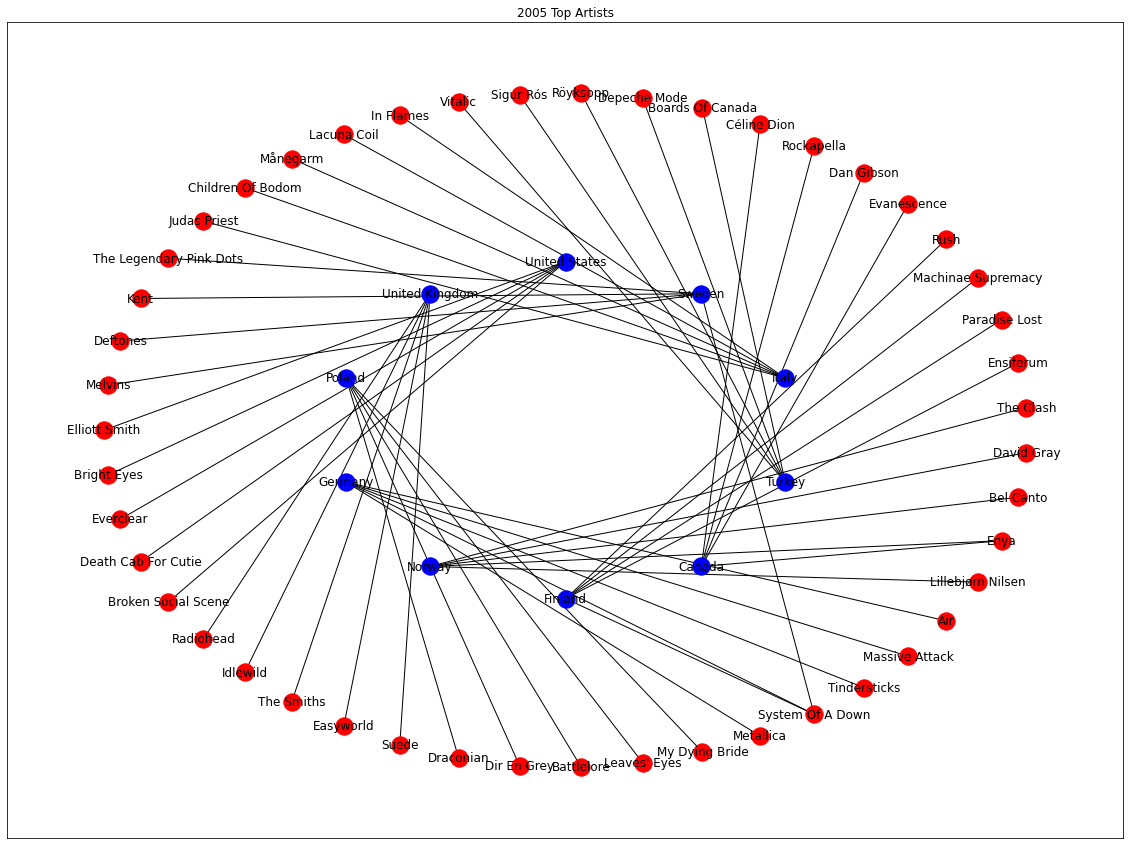

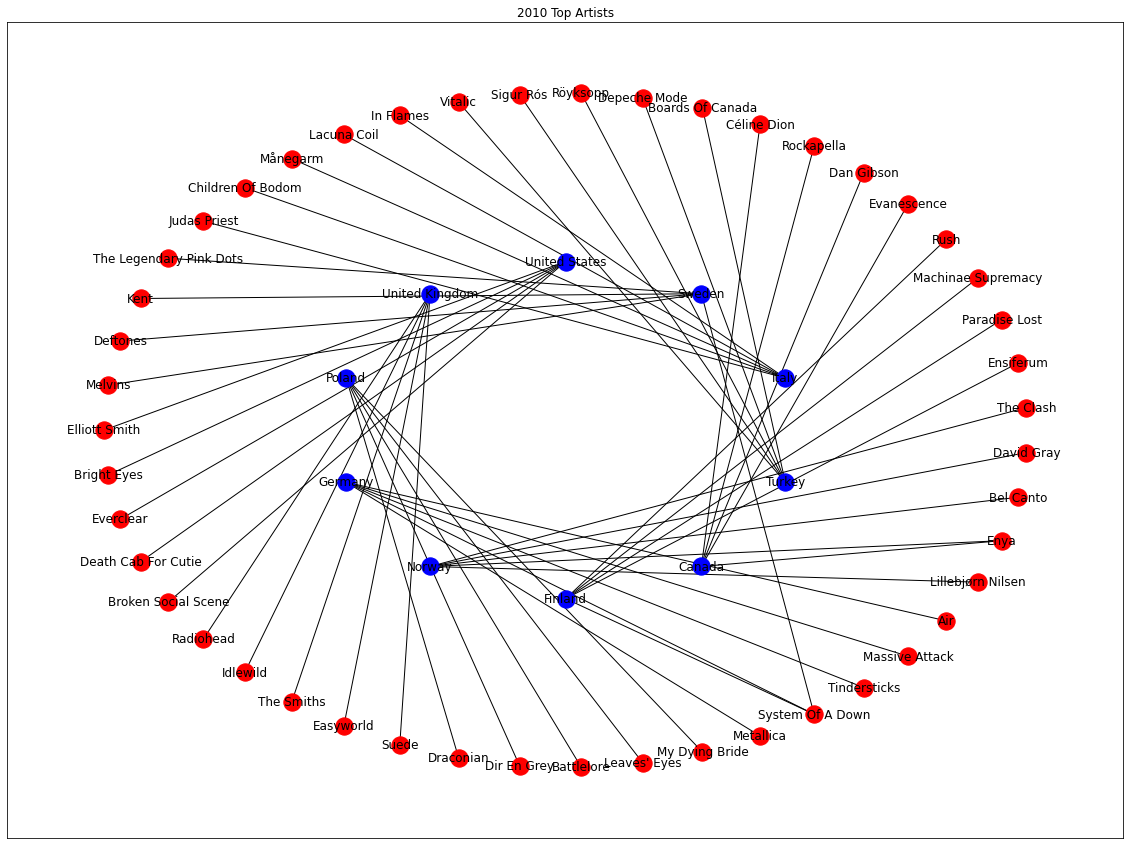

In [ ]:

# graphing networks for 2005 & 2009
nx.get_node_attributes(G_05,"artist")

def top_artists_graph(G):
    # top 10 countries that use Last.fm
    top_countries = ['United States', 'United Kingdom', 'Poland', 'Germany', 'Norway', 'Finland', 'Canada', 
                 'Turkey', 'Italy', 'Sweden']
    top_graph = G_05.subgraph(top_countries)
    top_graph = nx.Graph(top_graph)
    
    artist_list = list()
    edge_list = []
    for country in top_countries:
        # get neighbor and add it to the graph with appropriate edges
        neighbors = G_05.neighbors(country)
        for artist in neighbors:
            # if it's not in the graph add it
            if not artist in top_graph:
                top_graph.add_node(artist)
                artist_list.append(artist)
            # add edge for current country and artist
            top_graph.add_edge(country, artist)
            edge_list.append((country, artist))
    return top_graph, top_countries, artist_list, edge_list

plt.figure(1,figsize=(20,15))
plt.subplot()
top_05, countries, artists, edges = top_artists_graph(G_05)
pos = nx.random_layout(top_05)

shells = [countries, artists]
pos = nx.shell_layout(top_05, shells)

nx.draw_networkx_nodes(top_05, pos, nodelist=countries, node_color="b")
nx.draw_networkx_nodes(top_05, pos, nodelist=artists, node_color="r")

nx.draw_networkx_edges(top_05, pos)
nx.draw_networkx_labels(top_05, pos)

plt.title('2005 Top Artists')
plt.show()

# Plot 2009
plt.figure(2,figsize=(20,15))
plt.subplot()
top_10, countries, artists, edges = top_artists_graph(G_10)
pos = nx.random_layout(top_10)

shells = [countries, artists]
pos = nx.shell_layout(top_10, shells)

nx.draw_networkx_nodes(top_10, pos, nodelist=countries, node_color="b")
nx.draw_networkx_nodes(top_10, pos, nodelist=artists, node_color="r")

nx.draw_networkx_edges(top_10, pos)
nx.draw_networkx_labels(top_10, pos)

plt.title('2010 Top Artists')
plt.show()

# **Displaying Top Artist of Countries**

In [ ]:
# United States
print('United States Top Artists 2005-2009')

print('2005: %r \n' % [n for n in G_05.neighbors('United States')])
print('2006: %r \n' % [n for n in G_06.neighbors('United States')])
print('2007: %r \n' % [n for n in G_07.neighbors('United States')])
print('2008: %r \n' %[n for n in G_08.neighbors('United States')])
print('2009: %r \n' % [n for n in G_09.neighbors('United States')])

United States Top Artists 2005-2009
2005: ['Elliott Smith', 'Bright Eyes', 'Everclear', 'Death Cab For Cutie', 'Broken Social Scene'] 

2006: ['Radiohead', 'The Beatles', 'Death Cab For Cutie', 'Metric', 'Elliott Smith'] 

2007: ['Radiohead', 'The Beatles', 'Death Cab For Cutie', 'Humanwine', 'Modest Mouse'] 

2008: ['Radiohead', 'Nine Inch Nails', 'The Beatles', 'Elliott Smith', 'Girl Talk'] 

2009: ['Radiohead', 'The Beatles', 'Alkaline Trio', 'Nine Inch Nails', 'Fear Before The March Of Flames'] 



In [ ]:
# United Kingdom
print('United Kingdom Top Artists 2005-2009')

print('2005: %r \n' % [n for n in G_05.neighbors('United Kingdom')])
print('2006: %r \n' % [n for n in G_06.neighbors('United Kingdom')])
print('2007: %r \n' % [n for n in G_07.neighbors('United Kingdom')])
print('2008: %r \n' %[n for n in G_08.neighbors('United Kingdom')])
print('2009: %r \n' % [n for n in G_09.neighbors('United Kingdom')])

United Kingdom Top Artists 2005-2009
2005: ['Radiohead', 'Idlewild', 'The Smiths', 'Easyworld', 'Suede'] 

2006: ['Radiohead', 'Muse', 'Belle And Sebastian', 'Mando Diao', 'Snow Patrol'] 

2007: ['The Fray', 'Arcade Fire', 'Travis', 'Death Cab For Cutie', 'The Beatles'] 

2008: ['Radiohead', 'Bloc Party', 'Coldplay', 'Muse', 'Travis'] 

2009: ['Radiohead', 'Travis', 'Coldplay', 'Muse', 'The Veronicas'] 



In [ ]:
print('Germany Top Artists 2005-2009')
print('2005: %r \n' % G_05.neighbors('Germany'))
print('2006: %r \n' % G_06.neighbors('Germany'))
print('2007: %r \n' % G_07.neighbors('Germany'))
print('2008: %r \n' % G_08.neighbors('Germany'))
print('2009: %r \n' % G_09.neighbors('Germany'))

Germany Top Artists 2005-2009
2005: <dict_keyiterator object at 0x7f5a9aca4530> 

2006: <dict_keyiterator object at 0x7f5a9aca4530> 

2007: <dict_keyiterator object at 0x7f5a9aca4530> 

2008: <dict_keyiterator object at 0x7f5a9aca4530> 

2009: <dict_keyiterator object at 0x7f5a9aca4530> 



In [ ]:
print('Norway Top Artists 2005-2009')
print('2005: %r \n' % G_05.neighbors('Norway'))
print('2006: %r \n' % G_06.neighbors('Norway'))
print('2007: %r \n' % G_07.neighbors('Norway'))
print('2008: %r \n' % G_08.neighbors('Norway'))
print('2009: %r \n' % G_09.neighbors('Norway'))

Norway Top Artists 2005-2009
2005: <dict_keyiterator object at 0x7f5a9aca4a10> 

2006: <dict_keyiterator object at 0x7f5a9aca4a10> 

2007: <dict_keyiterator object at 0x7f5a9aca4a10> 

2008: <dict_keyiterator object at 0x7f5a9aca4a10> 

2009: <dict_keyiterator object at 0x7f5a9aca4a10> 



In [ ]:
print('Finland Top Artists 2005-2009')
print('2005: %r \n' % G_05.neighbors('Finland'))
print('2006: %r \n' % G_06.neighbors('Finland'))
print('2007: %r \n' % G_07.neighbors('Finland'))
print('2008: %r \n' % G_08.neighbors('Finland'))
print('2009: %r \n' % G_09.neighbors('Finland'))

Finland Top Artists 2005-2009
2005: <dict_keyiterator object at 0x7f5a9ab05170> 

2006: <dict_keyiterator object at 0x7f5a9ab05170> 

2007: <dict_keyiterator object at 0x7f5a9ab05170> 

2008: <dict_keyiterator object at 0x7f5a9ab05170> 

2009: <dict_keyiterator object at 0x7f5a9ab05170> 

